In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [159]:
data = pd.read_csv('dados_rpm_1hz.csv')

In [160]:
data_input = pd.read_csv('dados_senoide_1hz.csv')
data_input = data_input['tensao']

In [161]:
resposta = data['rpm']

In [162]:
freq_de_corte = 0.01  # Ajuste conforme necessário
ordem = 2

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, resposta)
resposta_filtrada = pd.DataFrame(resposta_filtrada)
resposta_filtrada.head()

,0
0,1056.645134
1,1095.898816
2,1135.742679
3,1176.168611
4,1217.167824


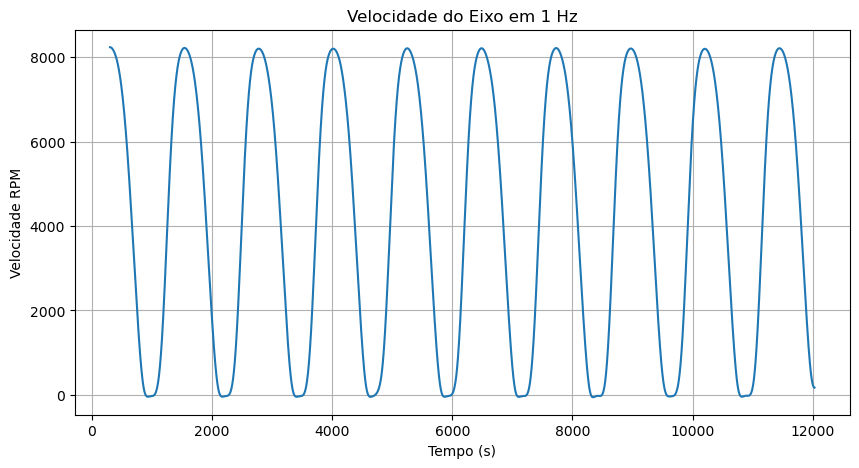

In [163]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(resposta_filtrada.iloc[300:])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 1 Hz')
plt.grid()
plt.show()